In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

c:\users\aech\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:

    а) зависимость цены на недвижимость в конкретном регионе от времени,
    
    б) скорость полета самолета при перелете из аэропорта А в аэропорт В,
    
    в) количество отказов компьютера,
    
    г) число обращений в поликлинику по району,
    
    д) координаты автобуса при движении по маршруту,
    
    е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

#### ОТВЕТ
* #### а)
* #### б) 
* #### г-если количество обращений в поликлинику по районам собирается, например, ежедневно


# 2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [2]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DUQ_MW  119068 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


Пропусков в данных нет.

In [10]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


Диапазон значений данных не показыввет наличие выбросов или заниженных значений. Информация адекватна.

In [47]:
data.index.value_counts().head()

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
Name: Datetime, dtype: int64

Имеются 4 случая с продублированными временными метками.
Четыре года подряд с 2014 по 2017 в ноябре дважды вносились данные в 2 часа ночи.


Найдем все проблемные дни, в которые пропускались ежечасные измерения или проводились неск раз в час.

In [209]:
problem_days = []
for day in pd.date_range(min(data.index), max(data.index), freq="D"):
    value = data[str(day.date())].index.day.value_counts().values[0]    
    if value != 24:
        problem_days.append([str(day.date()), value])
problem_days = np.array(problem_days)
pd.DataFrame(problem_days,columns=['date','counts'])

,date,counts
0,2005-01-01,23
1,2005-04-03,23
2,2005-10-30,23
3,2006-04-02,23
4,2006-10-29,23
5,2007-03-11,23
6,2007-11-04,23
7,2008-03-09,23
8,2008-11-02,23
9,2009-03-08,23


Пропуски можно интерполировать средним значением по соседним измерениям.

Проведем сортировку по дате, чтобы данные были упорядоченны в хроологии измерений.

In [212]:
data = data.sort_index()

Проведем визуальный анализ

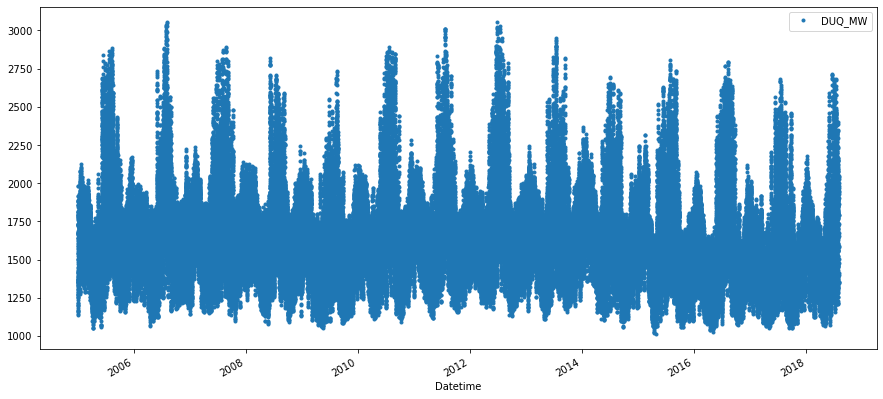

In [214]:
data.plot(style='.', figsize=( 15, 7 ))

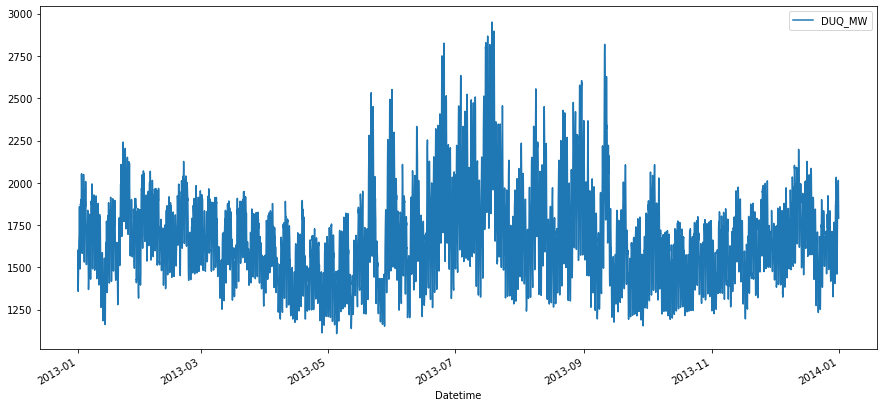

In [240]:
data['2013'].plot(style='-', figsize=( 15, 7 ))

Наблюдается сезонность потребления электроэнергии:

* большое возрастание в среднем с июля по сентябрь
* так же заметно возрастание (но не такое сильное как летом) в зимние месяца декабрь-февраль
* минимумы потребления в межсезонье

Возможно, в расматриваемом районе жаркое лето, которое заставляет людей пользоваться кондиционерами. Зимы не очень холодные, но все равно требуют затрат энергии на отопление. А может быть в регионе используются тепловые электростанции, которые помимо электричества генерируют тепло, то есть на отопление в таком районе может тратиться значительно меньше непосредственно электроэнергии. В межсезонье комфортная погода.

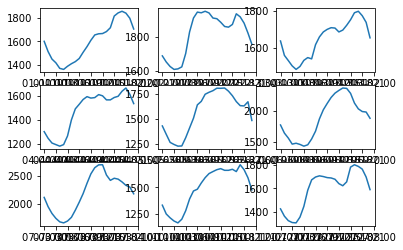

In [258]:
plt.subplot(3,3,1)
plt.plot(data['2013/01/01'] )
plt.subplot(3,3,2)
plt.plot(data['2016/02/12'] )
plt.subplot(3,3,3)
plt.plot(data['2015/03/01'] )

plt.subplot(3,3,4)
plt.plot(data['2018/04/04'] )
plt.subplot(3,3,5)
plt.plot(data['2005/05/26'] )
plt.subplot(3,3,6)
plt.plot(data['2010/06/19'] )

plt.subplot(3,3,7)
plt.plot(data['2012/07/03'] )
plt.subplot(3,3,8)
plt.plot(data['2011/10/10'] )
plt.subplot(3,3,9)
plt.plot(data['2015/12/07'] )

Наблюдается цикличность суточного хода потребления, ночью спад, к вечеру рост.

# 3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [278]:
brent = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
# по месяцам
m_brent = brent.resample("m").mean()
# по неделям
w_brent = brent.resample("w").mean()

In [279]:
m_brent.head()

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200


In [280]:
w_brent.head()

,Значение
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667


# 4. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

По неделям

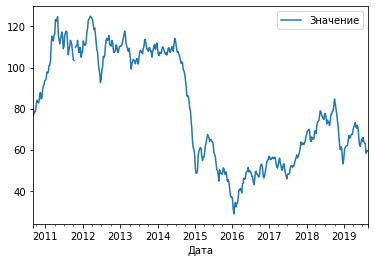

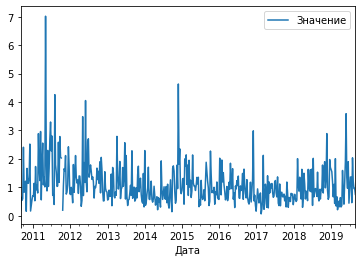

In [281]:
brent.resample("w").mean().plot()
brent.resample("w").std().plot()

По месяцам

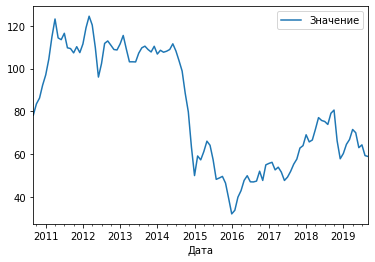

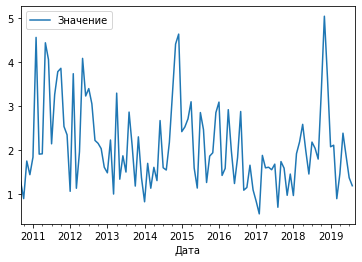

In [282]:
brent.resample("m").mean().plot()
brent.resample("m").std().plot()

По годам

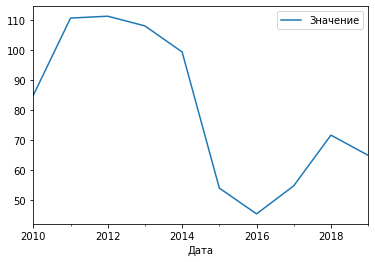

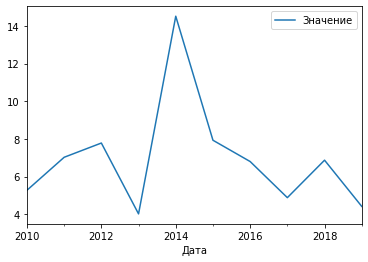

In [283]:
brent.resample("y").mean().plot()
brent.resample("y").std().plot()

# 5. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

Значение    26.349469
dtype: float64

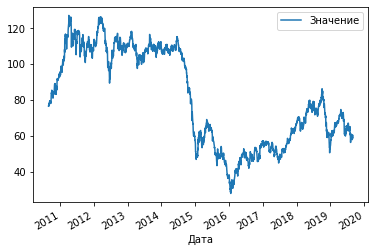

In [288]:
brent.plot()
brent.std()

Чем больше временной масштаб ресемплирования, тем более сглажен график изменения цены. Однако среднее отклонение во временных группах с большим масштабом больше.